In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pylab as plt

from image_analysis.read_files import get_paths, change_paths
from image_analysis.fit import plot, roi
from image_analysis.preprocess import mask

from tqdm import tqdm

In [3]:
pixel_size = 2

In [4]:
folder_pretreated = r'/home/natalia/Documents/github_image_analysis/experimental_data/treatment_all/'
df = pd.read_excel("../images.xlsx")

In [5]:
df.head()

,Sample name,HCR,"Animal size, cm","Regeneration time, dpa","Exact animal size (snout to tail), cm","Average animal size inside each group, cm",Unnamed: 6,Unnamed: 7
0,hcr11_lb27_fl,11,development,development,NaN,NaN,NaN,NaN
1,hcr11_lb28_fl,11,development,development,NaN,NaN,NaN,NaN
2,hcr15_lb41_fl,15,development,development,NaN,NaN,NaN,NaN
3,hcr16_lb44_fl,16,development,development,NaN,NaN,NaN,NaN
4,hcr16_lb45_fl,16,development,development,NaN,NaN,NaN,NaN


In [6]:
for pc in [40, 50, 60]:
    for morph in ['shh', 'fgf', 'dusp']:
        df[f'volume_{pc}pc_um3_{morph}']  = pd.NA

In [7]:
for i, file_name in tqdm( enumerate( df['Sample name'].values) ):
    
    file = os.path.join( folder_pretreated, file_name) + '.npy'
    
    keys = np.load( file.split('.npy')[0] + '_keys.npy' )
    image = dict(zip(
        keys,
        np.load( file )
    ))

    for pc in [40, 50, 60]:
        for morph in ['shh', 'fgf', 'dusp']:
            if f'{morph}{pc}_clip' in keys:
                if morph != 'shh':
                    df.loc[df['Sample name'] == file_name, f'volume_{pc}pc_um3_{morph}']  = np.sum(
                        pixel_size**3 * mask.few_largest_components( image[f'{morph}{pc}_clip'] > 0, 2 )
                    )
                else:
                    df.loc[df['Sample name'] == file_name, f'volume_{pc}pc_um3_{morph}']  = np.sum(
                        pixel_size**3 * mask.largest_component( image[f'{morph}{pc}_clip'] > 0 )
                    )

48it [04:21,  5.45s/it]


# Remove another method for Dusp

In [8]:
df.loc[df['HCR'] == 23, df.columns[df.columns.str.contains('dusp')]] = pd.NA

In [9]:
df.to_excel("results/volumes.xlsx", index=False)

# Plot

In [10]:
from matplotlib_defaults import *

In [11]:
colormap = plt.colormaps['Dark2']
colors = colormap(np.linspace(0, 1, 10))
sizes = [1.5, 3, 5, 7]
size_to_color = {
    'development': colors[1], 
    3.0: colors[2],
    5.0: colors[3],
    7.0: colors[4]
}

df['color'] = df['Animal size, cm'].map(size_to_color)

# Define the marker mapping
default_marker = 'o'  # Circle marker
special_marker = '*'  # Star marker for HCR = 23, another method for dusp staning
df['marker'] = df['HCR'].apply(lambda x: special_marker if x == 23 else default_marker)

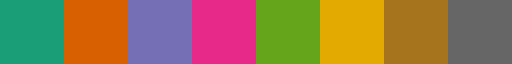

In [12]:
colormap

In [13]:
df = df.dropna(subset=['Regeneration time, dpa'])

In [14]:
df.loc[df['Regeneration time, dpa'] == 'development', 'Regeneration time, dpa'] = 1

In [15]:
df.head()

,Sample name,HCR,"Animal size, cm","Regeneration time, dpa","Exact animal size (snout to tail), cm","Average animal size inside each group, cm",Unnamed: 6,Unnamed: 7,volume_40pc_um3_shh,volume_40pc_um3_fgf,volume_40pc_um3_dusp,volume_50pc_um3_shh,volume_50pc_um3_fgf,volume_50pc_um3_dusp,volume_60pc_um3_shh,volume_60pc_um3_fgf,volume_60pc_um3_dusp,color,marker
0,hcr11_lb27_fl,11,development,1,NaN,NaN,NaN,NaN,268592,1405176,1512960,176392,892056,894928,93192,514792,513264,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
1,hcr11_lb28_fl,11,development,1,NaN,NaN,NaN,NaN,198592,2378080,764784,128968,1658408,451264,76568,1095904,228128,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
2,hcr15_lb41_fl,15,development,1,NaN,NaN,NaN,NaN,215840,2020696,3966400,141040,1080064,2955208,85336,568832,1962600,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
3,hcr16_lb44_fl,16,development,1,NaN,NaN,NaN,NaN,282944,2201000,2024416,188528,1652896,1482728,123720,1108680,889904,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
4,hcr16_lb45_fl,16,development,1,NaN,NaN,NaN,NaN,231744,1656472,2815464,138192,1052744,1980032,79960,670496,1302936,"[0.10588235294117647, 0.6196078431372549, 0.46...",o


## 50%

shh
mean_shh 1208768.0
std_shh 1764253.6206781368


fgf
mean_fgf 2362670.5
std_fgf 2347382.928091532


dusp
mean_dusp 12219175.030303031
std_dusp 20175465.536936764




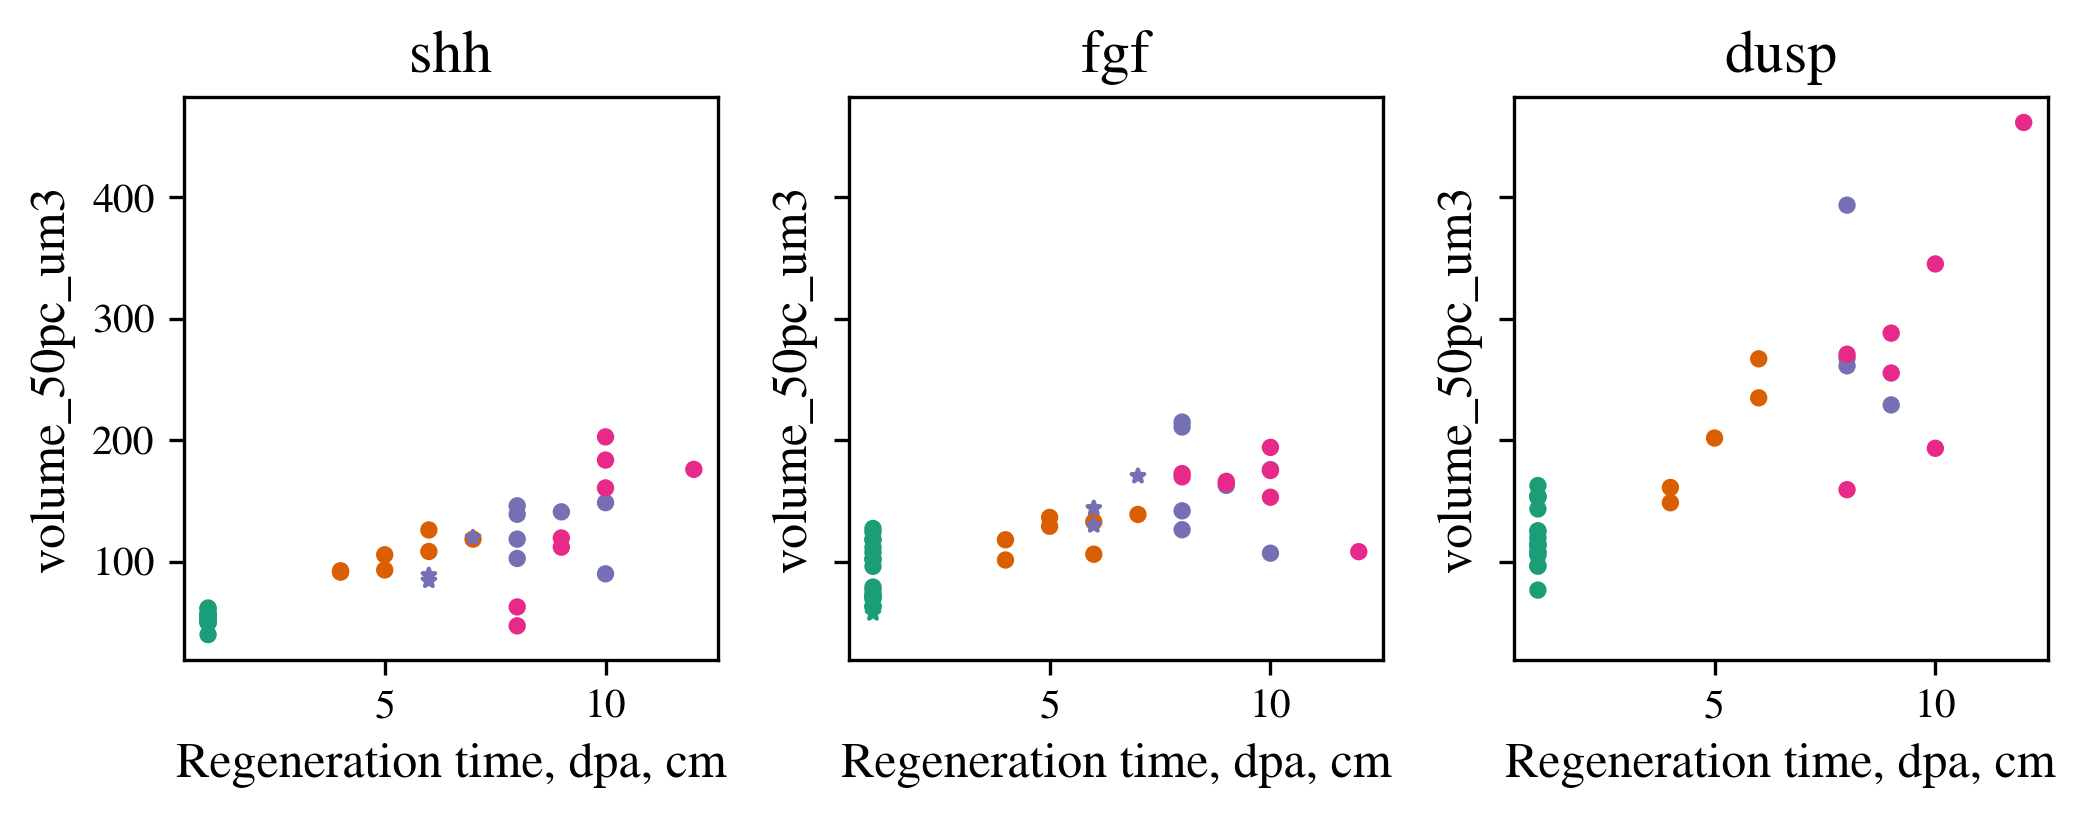

In [16]:
to_plot = 'volume_50pc_um3'

nrows, ncols = 1, 3

fig, ax = plt.subplots(nrows, ncols, figsize=(default_figsize["large"][0], default_figsize["large"][1]/3), sharex=False, sharey=True)

for i, morph in enumerate( ['shh', 'fgf', 'dusp'] ): 
    
    df_to_plot = df.dropna(subset=[f'{to_plot}_{morph}'])

    print(morph)
    mean = df_to_plot[ f'{to_plot}_{morph}' ].mean()
    print( f'mean_{morph}', mean )
    std  =  df_to_plot[ f'{to_plot}_{morph}' ].std()
    print( f'std_{morph}',  std )
    print('\n')
    
    ax = plt.subplot(nrows, ncols, i+1)
    
    for marker_type in df_to_plot['marker'].unique():
        subset = df_to_plot[df_to_plot['marker'] == marker_type]
        ax.scatter(
            subset['Regeneration time, dpa'],
            np.array( subset[f'{to_plot}_{morph}'] )**(1/3),
            color=subset['color'],  # Use the color column
            marker=marker_type,
            s=10  # Marker size
        )

    ax.set_xlabel( 'Regeneration time, dpa, cm' )
    ax.set_ylabel( to_plot )
    ax.set_title( morph )

    """
    # Add labels to each point
    for j, row in df_to_plot.iterrows():
        if row[f'{to_plot}_{morph}'] <= mean:
            ax.text(
                row['Regeneration time, dpa'],  # X-coordinate
                row[f'{to_plot}_{morph}'],  # Y-coordinate
                row['Sample name'],  # Label text
                fontsize=2,  # Very small font
            )
    """

plt.tight_layout()
plt.show()